# PHYS 210, Homework 11, Part 1
Due Wednesday, Oct 15, 2025 at the start of class on Canvas

*(Note: Part 2 of this Homework 11 assignment will be an initial task for Project 02 and will have its own submission assignment on Canvas)*

## *More practice with numpy arrays*

### 11.1 `np.where`, array filtering and array masking

Below is a sequence of tasks to gain a bit more practice using `np.where`, array filtering and array masking

In [1]:
# Load the array arr into memory

import numpy as np
arr = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

#### Task 1: Basic np.where()
With the help of `np.where`, create an array `indices` that contains indices of all elements greater than 10 from the array `arr`. 

In [2]:
# Your code here for indices
indices=np.where(arr > 10)[0]


In [3]:
# Test that indices contains the correct information
if isinstance(indices, tuple):
    print("*** Error. 'indices' is currently a tuple. ***")
    print("Recall that np.where returns a tuple and that you need to extract the array")
else:
    assert np.array_equal(indices, [5, 6, 7, 8, 9])
    print("You passed this test")

You passed this test


#### Task 2: np.where() as a conditional for array creation

Create a new array, `arr2`, which contains the same elements as `arr` except for elements with values less than 10 are replaced with 0.

If this use of `np.where` is new to you, you may wish to have a look at the usage and examples from the following documentation:
https://numpy.org/doc/2.0/reference/generated/numpy.where.html

In [4]:
# Your code here for arr2

arr2=np.where(arr >= 10, arr, 0)

In [5]:
# Test that arr2 has the correct values
assert np.array_equal(arr2, [0,0,0,0,10,12,14,16,18,20])
print("You passed this test")

You passed this test


#### Task 3: Array masks
In the preclass assignment we encountered a concept called array masking, but we didn't call it that. Array masking is when you create a boolean (True/False) array based on which of the array elements match a specific condition. 

For example, `arr>10` creates the array
```python
[False, False, False, False, False, True, True, True, True, True]
```
because the final 5 elements all meet the condition `arr>10`. We can use an array mask to subset an array, such as `arr[arr>10]` creates the following array because only those elements that correspond to `True` from the mask are selected for the new array:
```python
[12, 14, 16, 18, 20]
```



Create array mask `arr3` where only the elements divisible by 5 are `True`:

In [6]:
# Your code here for arr3

arr3 = arr % 5 == 0

In [7]:
# Test that arr3 has the correct values
assert np.array_equal(arr3, [False,False,False,False,True,False,False,False,False,True])
print("You passed this test")

You passed this test


#### Task 4: Basic Array Filtering
Now that we are reminded of how masks and array filtering work, create a new array `arr4` containing only the elements of `arr` that are divisible by 5.

In [8]:
# Your code here for arr4

arr4 = arr[arr3]

In [9]:
# Test that arr4 has the correct values
assert np.array_equal(arr4, [10, 20])
print("You passed this test")

You passed this test


#### Task 5: Complex Array Filtering
Using array filtering, create a new array `arr5` keeping only the numbers that are either less than 6 or greater than 16. Try to do this with only a single line of code. 

Note that in array filtering, when you want to perform an "or" operation, you need to use the `|` operator instead of the `or` operator. This is because you need to use a bit-wise "or" to combine the two masks (one checks for < 6 and the other for >16). The example we saw in the preclass assignment using a bit-wise "and" (`&`) was `a2[ (a2>0) & (a2<1) ]`.

In [10]:
# Your code here for arr5

arr5 = arr[(arr < 6) | (arr > 16)]

In [11]:
# Test that arr5 has the correct values
assert np.array_equal(arr5, [ 2,  4, 18, 20])
print("You passed this test")

You passed this test


### 11.2 Numpy-compliant functions

Take the `my_sign(a)` function from Preclass preparation assignent 11 and rewrite it so that it works with numpy arrays as arguments. It should return an array of the same shape as its argument (which may be 1, 2, or more dimensions), where the value of each element in the returned array is 1, 0 or -1 to reflect the sign of the value in the original array. It does not need to accept individual numbers as arguments, you can assume that an array is passed in.

```python
def my_sign(a):
    if a > 0:
        return 1
    if a < 0:
        return -1
    if a == 0:
        return 0
```

In [12]:
# Define your my_sign(a) function here

def my_sign_scalar(a):
    if a > 0:
        return 1
    if a < 0:
        return -1
    if a == 0:
        return 0
    
my_sign = np.vectorize(my_sign_scalar)

In [13]:
# Test that my_sign takes and returns an array
import numpy as np
a = my_sign(np.array([-4,4,2,0,3]))
assert type(a) == np.ndarray, "The function did not return an array"
print("my_sign takes and returns an array")

my_sign takes and returns an array


In [14]:
# Test that the correct values are returned
import numpy as np
from numpy.testing import assert_equal
assert_equal(my_sign(np.array([2,4,1,0,-3,-7,27])), np.array([1,1,1,0,-1,-1,1]))
print("the correct values are returned")

the correct values are returned


In [15]:
# Test that the correct values are returned for floats
import numpy as np
from numpy.testing import assert_equal, assert_almost_equal
assert_equal(my_sign(np.array([-2.3,1.,0.,-7.6])), np.array([-1,1,0,-1]), 
             err_msg = "*** Function does not handle floats correctly")
print("the correct values are returned for floats")

the correct values are returned for floats


In [16]:
# Test that the function works with 2D arrays
import numpy as np
from numpy.testing import assert_equal, assert_almost_equal
b = np.array([[5,-3,2],[9,0,-2]])
assert_equal(my_sign(b),np.array([[1,-1,1],[1,0,-1]]), 
             err_msg = "*** Function does not handle 2D arrays correctly")
print("the function works with 2D arrays")

the function works with 2D arrays


### 11.3 `meshgrid`

Calculate $\exp(-r^2)$ on a 2-dimensional grid, similar to what was done in the preclass preparation assignment.

Define a function `exp_r2()` that will: 

* Use `numpy.meshgrid()` to generate a 2000 x 2000 point grid that covers the range of -3 to +3 on both axes. 
* Calculate $\exp(-r^2)$ and return a 2d, 2000 x 2000 array of these values. 
* You may consider using either `numpy.arange()` or `numpy.linspace()` for generating the initial points along each axis.

In [17]:
# Define your exp_r2() function here

def exp_r2():
    x = np.linspace(-3, 3, 2000)
    y = np.linspace(-3, 3, 2000)
    X,Y = np.meshgrid(x,y)
    return np.exp(-X ** 2 -Y ** 2)

In [18]:
# Test that exp_r2 runs and returns an array of the desired shape
assert(exp_r2().shape == (2000,2000))
print("exp_r2 returns an array of the desired shape")

exp_r2 returns an array of the desired shape


### 11.4 `imshow`

Use `plt.imshow()`) with your function exp_r2() to reproduce the plot shown below. Don't worry about matching the exact colours or size.

![imshow plot](https://i.ibb.co/bL8TJ9L/imshow.png)

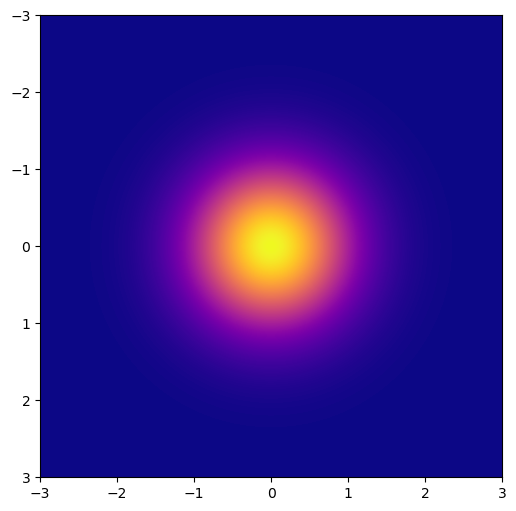

In [19]:
# Your code here
from matplotlib import pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(exp_r2(), cmap=mpl.colormaps['plasma'], extent=[-3, 3, 3, -3])
plt.show()

## *Completing this solo worksheet and submitting it to Canvas*
Before submitting your work, restart + rerun your entire notebook to make sure that everything runs correctly and without error.

To do this:
1. **Restart & Run All:** From the "Kernel" menu to the right of the "Cell" menu, select "Restart & Run All". This will restart the python Kernel, erasing all variables currently stored in memory so that when you "Run All" cells, you can ensure that if you were to run your notebook again on a later day, it would run as intended.
1. Look through the whole notebook and make sure there are no errors. Many questions have purposeful errors in the distributed version so make sure you have fixed them all such that "Restart & Run All" will run through the whole book and successfully print "The notebook ran without errors" at the end. If you have any trouble resolving the errors, please ask one of your classmates or ask us in class or on Piazza.

**Export notebook as HTML:** After you've executed and checked your notebook, choose: File => Save_and_Export_Notebook_As => HTML. This will download an HTML version of your notebook to your computer. This version is can not be executed or modified. You may need to disable any pop-up blockers to allow the file to be downloaded.

**Submit to Canvas:** Submit the html file that you just downloaded to the appropriate Solo Worksheet submission on Canvas.

In [20]:
print("The notebook ran without errors")

The notebook ran without errors
